In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import preprocessing, tree, datasets, base
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings


In [89]:
warnings.filterwarnings("ignore")

In [90]:
# 1. Load data
# Memuat data dari file CSV ke dalam DataFrame
data = pd.read_csv('Transformed Data Set - Sheet1.csv')

In [91]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [92]:
data.tail()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


In [93]:
data.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [95]:
data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [96]:

# 2. Mengubah kolom "Gender" menjadi numerik
# Mengubah nilai "F" menjadi 1 (Female) dan "M" menjadi 0 (Male)
data['Gender'] = data['Gender'].map({'F': 1, 'M': 0})

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Favorite Color'] = label_encoder.fit_transform(data['Favorite Color'])
data['Favorite Music Genre'] = label_encoder.fit_transform(data['Favorite Music Genre'])
data['Favorite Beverage'] = label_encoder.fit_transform(data['Favorite Beverage'])
data['Favorite Soft Drink'] = label_encoder.fit_transform(data['Favorite Soft Drink'])

In [98]:
# 3. Memisahkan fitur dan target
# Fitur adalah kolom-kolom preferensi (warna, genre musik, minuman, minuman ringan)
# Target adalah kolom "Gender"
X = data[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']]
y = data['Gender']

In [99]:
target = "Gender"

# Checking for NA values

data.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [100]:
# Checking for duplicated data

data.duplicated().sum()

4

In [101]:
# Dropping duplicated data

data.drop_duplicates(inplace = True)

In [102]:
print(data.shape)

data.duplicated().sum()

(62, 5)


0

In [103]:
# 4. Membagi data menjadi set pelatihan dan pengujian
# Memisahkan data menjadi set pelatihan dan pengujian dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Favorite Color
0    33
2    22
1     7
Name: count, dtype: int64



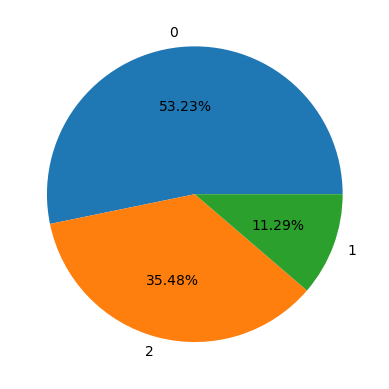

Favorite Music Genre
4    17
6    16
0     8
2     7
5     6
1     4
3     4
Name: count, dtype: int64



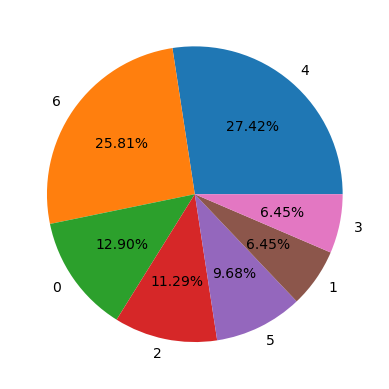

Favorite Beverage
1    14
0    12
5    10
2    10
4     9
3     7
Name: count, dtype: int64



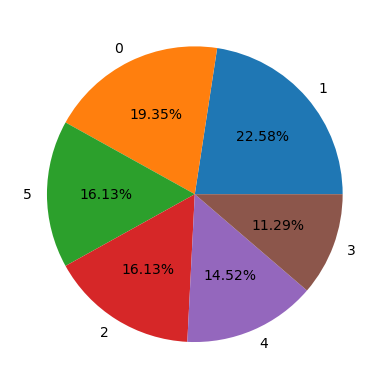

Favorite Soft Drink
1    28
2    14
0    13
3     7
Name: count, dtype: int64



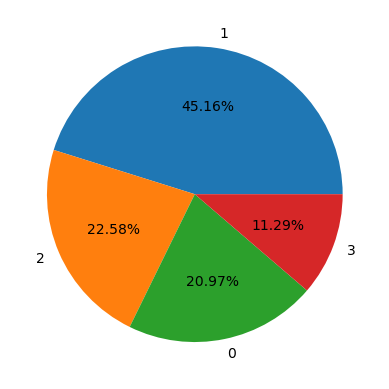

Gender
1    31
0    31
Name: count, dtype: int64



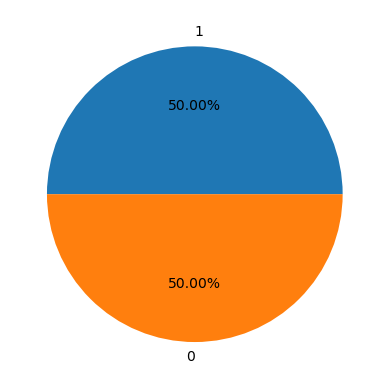

In [104]:
# Count of each category in each of the columns

for col in data.columns:
    val_counts = data[col].value_counts()
    print(val_counts, end = "\n\n")
    plt.pie(val_counts, autopct = "%.2f%%", labels = val_counts.index)
    plt.show()

In [105]:
# 5. Melatih model Logistic Regression
# Membuat model Logistic Regression dan melatihnya dengan data pelatihan
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
# 6. Mengevaluasi model
# Menggunakan model yang telah dilatih untuk memprediksi jenis kelamin pada set pengujian
y_pred = model.predict(X_test)

In [107]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6428571428571429


In [108]:
# Menghitung confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[6 1]
 [4 3]]


In [110]:
# 7. Menyimpan model
# Menyimpan model yang telah dilatih menggunakan joblib
joblib.dump(model, 'Klasifikasi_Model_Gender.pkl')

['Klasifikasi_Model_Gender.pkl']